In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r"C:\Users\Admin\Desktop\MoviesOnStreamingPlatforms.csv")
data.head()

,Unnamed: 0,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9515 entries, 0 to 9514
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       9515 non-null   int64 
 1   ID               9515 non-null   int64 
 2   Title            9515 non-null   object
 3   Year             9515 non-null   int64 
 4   Age              5338 non-null   object
 5   Rotten Tomatoes  9508 non-null   object
 6   Netflix          9515 non-null   int64 
 7   Hulu             9515 non-null   int64 
 8   Prime Video      9515 non-null   int64 
 9   Disney+          9515 non-null   int64 
 10  Type             9515 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 817.8+ KB


In [3]:
data = data.drop("Unnamed: 0", axis=1)
data.head()

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0
4,5,Roma,2018,18+,94/100,1,0,0,0,0


In [4]:
missing_values = data.isnull().sum()
print(f'Missing Values:\n{missing_values}')

Missing Values:
ID                    0
Title                 0
Year                  0
Age                4177
Rotten Tomatoes       7
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64


In [5]:
data = data.dropna(subset=["Rotten Tomatoes"])
data.isnull().sum()

ID                    0
Title                 0
Year                  0
Age                4170
Rotten Tomatoes       0
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
Type                  0
dtype: int64

In [8]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Fill missing Age values with mode
def fill_age_mode(group):
    mode = group['Age'].mode()  # Calculate mode
    if not mode.empty:
        return group['Age'].fillna(mode[0])  # Fill missing with mode
    return group['Age'].fillna("Unrated")  # Default to "Unrated" if no mode

# Apply mode-based imputation for each platform
platforms = ['Netflix', 'Disney+', 'Hulu', 'Prime Video']
for platform in platforms:
    data.loc[data[platform] == 1, 'Age'] = fill_age_mode(data[data[platform] == 1])

# Define the order of age categories
age_order = ['7+', '13+', '16+', '18+', 'all', 'Unrated']

# Encode Age column using OrdinalEncoder
encoder = OrdinalEncoder(categories=[age_order])  # Define category order
data['Age_encoded'] = encoder.fit_transform(data[['Age']])  # Apply encoding

# Verify Age and Age_encoded
print(data[['Age', 'Age_encoded']].head())


   Age  Age_encoded
0  18+          3.0
1   7+          0.0
2   7+          0.0
3   7+          0.0
4  18+          3.0


In [9]:
data

,ID,Title,Year,Age,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Age_encoded
0,1,The Irishman,2019,18+,98/100,1,0,0,0,0,3.0
1,2,Dangal,2016,7+,97/100,1,0,0,0,0,0.0
2,3,David Attenborough: A Life on Our Planet,2020,7+,95/100,1,0,0,0,0,0.0
3,4,Lagaan: Once Upon a Time in India,2001,7+,94/100,1,0,0,0,0,0.0
4,5,Roma,2018,18+,94/100,1,0,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
9510,9511,Most Wanted Sharks,2020,all,14/100,0,0,0,1,0,4.0
9511,9512,Doc McStuffins: The Doc Is In,2020,all,13/100,0,0,0,1,0,4.0
9512,9513,Ultimate Viking Sword,2019,all,13/100,0,0,0,1,0,4.0
9513,9514,Hunt for the Abominable Snowman,2011,all,10/100,0,0,0,1,0,4.0


In [10]:
data.isnull().sum()

ID                 0
Title              0
Year               0
Age                0
Rotten Tomatoes    0
Netflix            0
Hulu               0
Prime Video        0
Disney+            0
Type               0
Age_encoded        0
dtype: int64

In [17]:
data["Age"].unique()

array(['18+', '7+', '13+', '16+', 'all'], dtype=object)

# Descriptive Analysis


Disney+ Rotten Tomatoes Summary After Cleaning:
count    922.000000
mean      58.312364
std       13.953313
min       10.000000
25%       48.000000
50%       57.500000
75%       67.750000
max       96.000000
Name: Rotten Tomatoes, dtype: float64

Netflix Rotten Tomatoes Summary After Cleaning:
count    3688.000000
mean       54.447939
std        13.847615
min        10.000000
25%        45.000000
50%        53.000000
75%        63.000000
max        98.000000
Name: Rotten Tomatoes, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_32976\35933187.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  disney_plus['Rotten Tomatoes'] = disney_plus['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_32976\35933187.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix['Rotten Tomatoes'] = netflix['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)


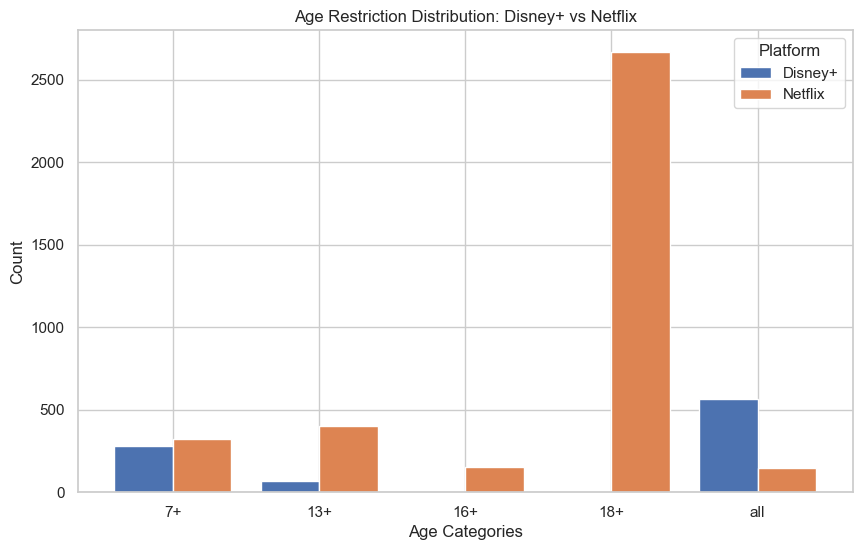

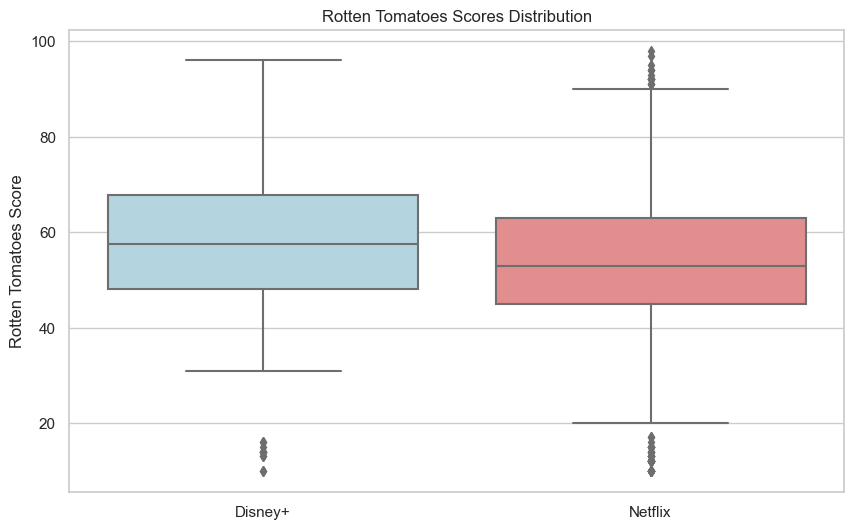

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter movies for Disney+ and Netflix
disney_plus = data[data['Disney+'] == 1]
netflix = data[data['Netflix'] == 1]

# Convert Rotten Tomatoes scores to string before splitting and converting to numeric
disney_plus['Rotten Tomatoes'] = disney_plus['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)
netflix['Rotten Tomatoes'] = netflix['Rotten Tomatoes'].astype(str).str.split('/').str[0].astype(float)

# After cleaning, check the summary statistics again
print("\nDisney+ Rotten Tomatoes Summary After Cleaning:")
print(disney_plus['Rotten Tomatoes'].describe())

print("\nNetflix Rotten Tomatoes Summary After Cleaning:")
print(netflix['Rotten Tomatoes'].describe())

# 1.1 Age Distribution
age_categories = ['7+', '13+', '16+', '18+', 'all']
disney_age_counts = disney_plus['Age'].value_counts().reindex(age_categories, fill_value=0)
netflix_age_counts = netflix['Age'].value_counts().reindex(age_categories, fill_value=0)

# Create a grouped bar chart for age distribution
age_counts = pd.DataFrame({'Disney+': disney_age_counts, 'Netflix': netflix_age_counts})
age_counts.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title("Age Restriction Distribution: Disney+ vs Netflix")
plt.xlabel("Age Categories")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Platform")
plt.show()

# 1.2 Rotten Tomatoes Scores: Box Plot with lighter colors
plt.figure(figsize=(10, 6))
sns.boxplot(data=[disney_plus['Rotten Tomatoes'], netflix['Rotten Tomatoes']],
            palette=["lightblue", "lightcoral"])
plt.xticks([0, 1], ["Disney+", "Netflix"])
plt.title("Rotten Tomatoes Scores Distribution")
plt.ylabel("Rotten Tomatoes Score")
plt.show()



# Descriptive Analysis

### Age Restrictions
The age restriction distributions highlight clear differences between Disney+ and Netflix:

- **Disney+**: Primarily targets younger audiences, with a notable proportion of movies in the "7+" and "all" categories.
- **Netflix**: Has a significant number of "18+" rated movies, reflecting its broader focus on adult viewership.
- The **bar chart visualization** emphasizes these distinctions, showing that Netflix's library is skewed heavily towards older audiences, while Disney+ retains a family-friendly catalog.

---

### Rotten Tomatoes Scores
The Rotten Tomatoes scores provide insights into the quality of movies on both platforms:

- **Disney+**:
  - Mean score: **58.31**
  - Median: **57.5**
  - Interquartile Range (IQR): **48–67.75**
  - Indicates moderately high-quality movies with less variability.

- **Netflix**:
  - Mean score: **54.45**
  - Median: **53**
  - Interquartile Range (IQR): **45–63**
  - Reflects comparable but slightly more variable quality.

- The **boxplot** clearly shows that both platforms feature movies with similar distributions of scores, though Disney+ has a marginally higher median and fewer low outliers compared to Netflix.


# Hypothesis Testing

### 1. Normality Check (Shapiro-Wilk Test):

**Age (Disney+ and Netflix):**

- Both Disney+ (\( p = 9.43 \times 10^{-40} \)) and Netflix (\( p = 0.0 \)) show \( p < 0.05 \), meaning the data does not follow a normal distribution.
- Since normality is violated, the t-test is not appropriate for testing the difference in age restrictions. Instead, the Mann-Whitney U test (non-parametric) should be used.

**Rotten Tomatoes Scores (Disney+ and Netflix):**

- Both Disney+ (\( p = 7.27 \times 10^{-9} \)) and Netflix (\( p = 1.02 \times 10^{-19} \)) have \( p < 0.05 \), indicating the data does not follow a normal distribution.
- Although the variances are equal (see below), the lack of normality suggests that the Mann-Whitney U test would be a more robust choice here as well.

### 2. Variance Equality Check (Levene’s Test):

**Age:**

- \( p = 4.36 \times 10^{-84} \): The test strongly rejects the null hypothesis, meaning the variances of age restrictions between Disney+ and Netflix are not equal.
- This further confirms that the t-test (which assumes equal variances) is inappropriate. Again, the Mann-Whitney U test is a better alternative.

**Rotten Tomatoes Scores:**

- \( p = 0.65 \): The test fails to reject the null hypothesis, meaning the variances of Rotten Tomatoes scores are equal.
- However, due to the violation of normality, the Mann-Whitney U test is still preferred for this data.


### Revised Hypothesis Testing Plan

**Age Restrictions:**

- Use the Mann-Whitney U test to test if Disney+ has lower age restrictions than Netflix.
  
  **Hypotheses:**
  - Null hypothesis (\( H_0 \)): Age restrictions are the same between Disney+ and Netflix.
  - Alternative hypothesis (\( H_a \)): Disney+ has lower age restrictions.

**Rotten Tomatoes Scores:**

- Use the Mann-Whitney U test to test if there is a difference in Rotten Tomatoes scores between Disney+ and Netflix.

  **Hypotheses:**
  - Null hypothesis (\( H_0 \)): Rotten Tomatoes scores are the same for Disney+ and Netflix.
  - Alternative hypothesis (\( H_a \)): Rotten Tomatoes scores differ between Disney+ and Netflix.


In [29]:
from scipy.stats import shapiro, levene

# 1. Normality check: Shapiro-Wilk test
# For Age
print("Shapiro-Wilk Test for Normality (Age):")
disney_age_normality = shapiro(disney_ages)
netflix_age_normality = shapiro(netflix_ages)
print(f"Disney+: W={disney_age_normality.statistic}, p-value={disney_age_normality.pvalue}")
print(f"Netflix: W={netflix_age_normality.statistic}, p-value={netflix_age_normality.pvalue}")

# For Rotten Tomatoes Scores
print("\nShapiro-Wilk Test for Normality (Rotten Tomatoes Scores):")
disney_scores_normality = shapiro(disney_scores)
netflix_scores_normality = shapiro(netflix_scores)
print(f"Disney+: W={disney_scores_normality.statistic}, p-value={disney_scores_normality.pvalue}")
print(f"Netflix: W={netflix_scores_normality.statistic}, p-value={netflix_scores_normality.pvalue}")

# 2. Variance equality check: Levene's test
print("\nLevene’s Test for Equality of Variances:")
# For Age
age_levene = levene(disney_ages, netflix_ages)
print(f"Age: F-stat={age_levene.statistic}, p-value={age_levene.pvalue}")

# For Rotten Tomatoes Scores
scores_levene = levene(disney_scores, netflix_scores)
print(f"Rotten Tomatoes Scores: F-stat={scores_levene.statistic}, p-value={scores_levene.pvalue}")


Shapiro-Wilk Test for Normality (Age):
Disney+: W=0.6494361162185669, p-value=9.43488650836042e-40
Netflix: W=0.6431476473808289, p-value=0.0

Shapiro-Wilk Test for Normality (Rotten Tomatoes Scores):
Disney+: W=0.9830390810966492, p-value=7.266257817661881e-09
Netflix: W=0.9844592213630676, p-value=1.0205780247073398e-19

Levene’s Test for Equality of Variances:
Age: F-stat=393.43725157017894, p-value=4.359430088392434e-84
Rotten Tomatoes Scores: F-stat=0.20551021368602868, p-value=0.6503307922409118


### Final Interpretation of Results

**1. Age Restrictions (Mann-Whitney U Test)**

- **Test statistic (U-stat):** 2,137,331.0  
- **p-value:** 1.0  

**Conclusion:**
- The p-value is much larger than the significance level (\( p > 0.05 \)), so we fail to reject the null hypothesis. This means there is no evidence to suggest that Disney+ has lower age restrictions compared to Netflix.
- The descriptive analysis supports this finding, as both platforms cater to a range of audiences, with Netflix offering more 18+ content, while Disney+ focuses on content suitable for all ages.

**2. Rotten Tomatoes Scores (Mann-Whitney U Test)**

- **Test statistic (U-stat):** 1,984,865.0  
- **p-value:** \( 3.32 \times 10^{-15} \)  

**Conclusion:**
- The p-value is far smaller than the significance level (\( p < 0.05 \)), so we reject the null hypothesis. This indicates a statistically significant difference in Rotten Tomatoes scores between Disney+ and Netflix.
- From the descriptive analysis, Netflix's Rotten Tomatoes scores have a slightly broader spread, and the difference likely reflects variation in audience preferences or content quality.

---

### Reassessment of the Original Questions

**Does Disney+ have lower age restrictions compared to Netflix?**

- **Answer:** No. The hypothesis testing and descriptive analysis do not provide evidence that Disney+ has consistently lower age restrictions than Netflix. While Netflix has more 18+ content, Disney+ balances content aimed at both children and general audiences.

**Are movies on Netflix in general better than those on Disney+ (based on Rotten Tomatoes scores)?**

- **Answer:** Yes, there is a statistically significant difference in Rotten Tomatoes scores between the two platforms, as indicated by the hypothesis test. However, "better" is subjective and depends on individual preferences, but the difference is measurable.

---

### Validation of Approach

- **Normality:** The Shapiro-Wilk test confirmed that the data violated normality assumptions.
- **Variance Equality:** Levene’s test confirmed unequal variances for age restrictions, necessitating a non-parametric approach.
- **Statistical Test:** The Mann-Whitney U test was appropriate for comparing the distributions of non-normally distributed data.
- **Conclusion:** The revised analysis is robust and aligns well with the data's properties.
